In [1]:
import statsmodels.api as sm
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ML02_Airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.columns

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [4]:
df.columns = ['Date', 'Passengers']
df.head()
df.shape

(145, 2)

In [5]:
df.dropna(inplace = True)
df.shape

(144, 2)

In [8]:
df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)

In [9]:
df.head()

,Date,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


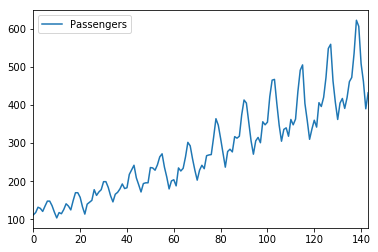

In [10]:
df.plot()

### Rolling Statistics 


In [11]:
df.set_index('Date', inplace = True)
df.head()

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


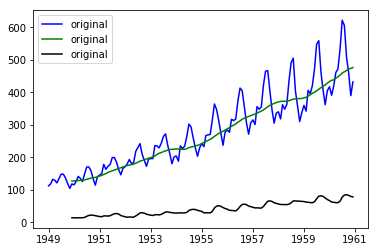

In [12]:
rol_mean = df.rolling(window=12).mean()
rol_std = df.rolling(window=12).std()

original = plt.plot(df, color = 'blue', label = 'original')
rollmean = plt.plot(rol_mean, color = 'green', label = 'original')
rollstd = plt.plot(rol_std, color = 'black', label = 'original')
plt.legend(loc='best')
plt.show()

In [31]:
df.head()

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [13]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Passengers'], autolag='AIC')
dftest_output = pd.Series(dftest[0:4], index = ['Test Statistics', 'p_Value', '# Lags Uses', 'No.of Observations'])
for key, value in dftest[4].items():
    dftest_output['Crtical Value (%s)'%key]= value

print(dftest_output)


Test Statistics          0.815369
p_Value                  0.991880
# Lags Uses             13.000000
No.of Observations     130.000000
Crtical Value (10%)     -2.578770
Crtical Value (5%)      -2.884042
Crtical Value (1%)      -3.481682
dtype: float64


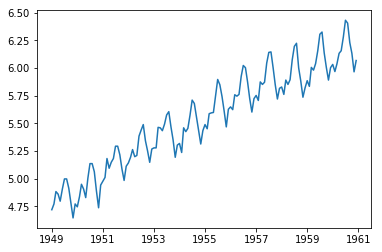

In [14]:
ts_log = np.log(df)
plt.plot(ts_log)


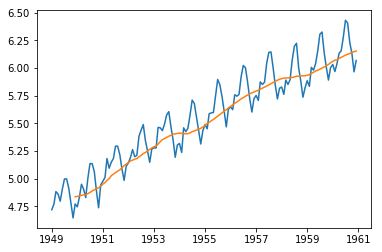

In [15]:
ts_log_ma = ts_log.rolling(window=12).mean()
ts_log_std = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(ts_log_ma)

In [16]:
ts_log_ma_diff = ts_log - ts_log_ma
ts_log_ma_diff.dropna(inplace= True)
ts_log_ma_diff.head()

,Passengers
Date,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [26]:
def test_stat(ts):
    ts_ma = ts.rolling(window=12).mean()
    ts_std = ts.rolling(window=12).std()
    
    org = plt.plot(ts, color = 'blue', label = 'original')
    mean = plt.plot(ts_ma, color='red', label = 'Rolling Mean')
    std = plt.plot(ts_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.show()
    
    print('AD Fuller test results')
    adf = adfuller(ts['Passengers'],autolag = 'AIC')
    adf_result = pd.Series(adf[0:4], index = ['Test Stat', 'P_Value', 'Lags Usesd', 'No.of Observations'])
    for key, value in dftest[4].items():
        adf_result['Crtical Value (%s)'%key]= value
    print(adf_result)


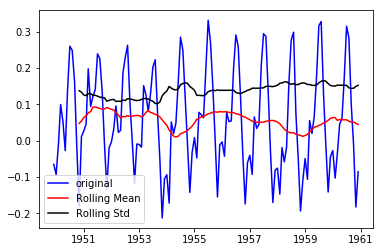

AD Fuller test results
Test Stat               -3.162908
P_Value                  0.022235
Lags Usesd              13.000000
No.of Observations     119.000000
Crtical Value (10%)     -2.578770
Crtical Value (5%)      -2.884042
Crtical Value (1%)      -3.481682
dtype: float64


In [27]:
test_stat(ts_log_ma_diff)

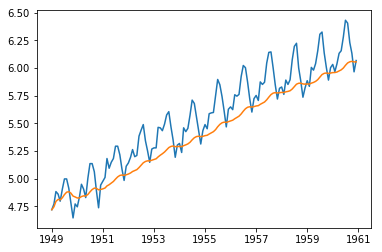

In [28]:
ts_log_emv = ts_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(ts_log_emv)

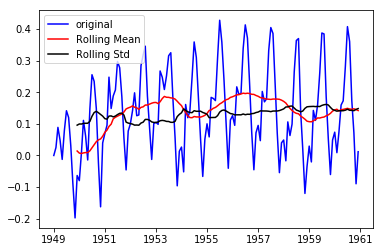

AD Fuller test results
Test Stat               -3.601262
P_Value                  0.005737
Lags Usesd              13.000000
No.of Observations     130.000000
Crtical Value (10%)     -2.578770
Crtical Value (5%)      -2.884042
Crtical Value (1%)      -3.481682
dtype: float64


In [29]:
ts_log_emv_diff = ts_log- ts_log_emv
ts_log_emv_diff.dropna(inplace = True)

test_stat(ts_log_emv_diff)

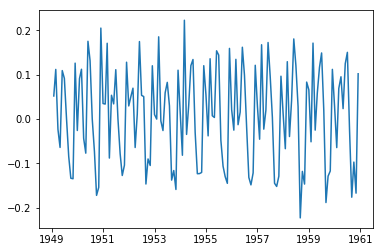

In [30]:
ts_log_shift = ts_log - ts_log.shift()
plt.plot(ts_log_shift)

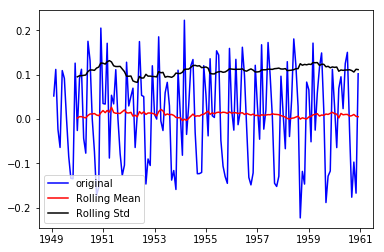

AD Fuller test results
Test Stat               -2.717131
P_Value                  0.071121
Lags Usesd              14.000000
No.of Observations     128.000000
Crtical Value (10%)     -2.578770
Crtical Value (5%)      -2.884042
Crtical Value (1%)      -3.481682
dtype: float64


In [31]:
ts_log_shift.dropna(inplace=True)
test_stat(ts_log_shift)

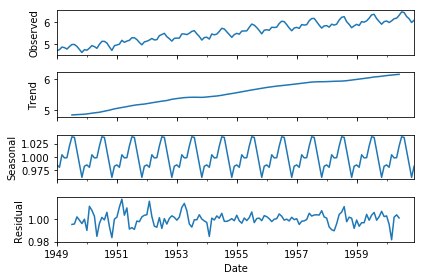

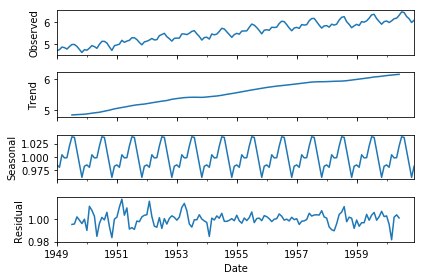

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts_log, model = 'multiplicative')
result.plot()


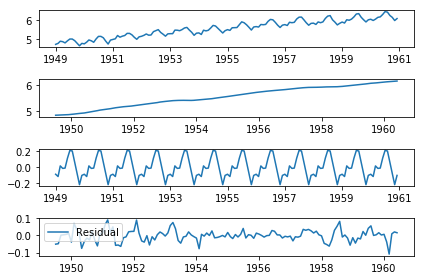

In [37]:
# Another part 

decomp = seasonal_decompose(ts_log)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')

plt.subplot(412)
plt.plot(trend, label = 'trend')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')

plt.subplot(414)
plt.plot(residual, label = 'Residual')

plt.legend(loc = 'best')
plt.tight_layout()

In [38]:
decomp_residual = residual

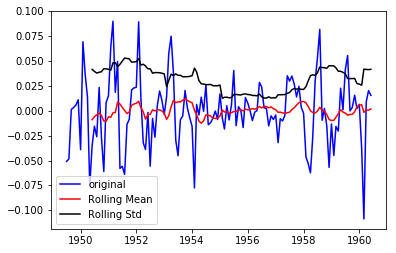

AD Fuller test results
Test Stat             -6.332387e+00
P_Value                2.885059e-08
Lags Usesd             9.000000e+00
No.of Observations     1.220000e+02
Crtical Value (10%)   -2.578770e+00
Crtical Value (5%)    -2.884042e+00
Crtical Value (1%)    -3.481682e+00
dtype: float64


In [39]:
decomp_residual.dropna(inplace=True)
test_stat(decomp_residual)

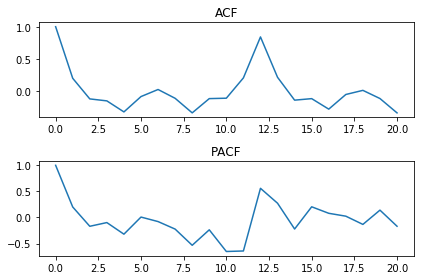

In [41]:
from statsmodels.tsa.stattools import pacf, acf
lag_acf = acf(ts_log_shift, nlags = 20)
lag_pacf = pacf(ts_log_shift, nlags = 20)

plt.subplot(211)
plt.plot(lag_acf)
plt.title('ACF')

plt.subplot(212)
plt.plot(lag_pacf)
plt.title('PACF')

plt.tight_layout()



C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


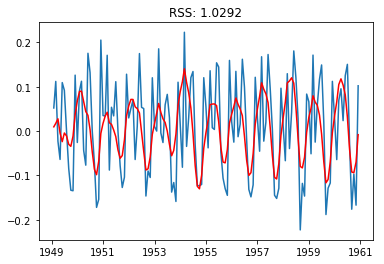

In [47]:
# from abouve p and q are 2,2 

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order = (2,1,2))
results = model.fit(disp=-1)

plt.plot(ts_log_shift)
plt.plot(results.fittedvalues, color = 'red')

plt.title('RSS: %.4f' %sum((results.fittedvalues-ts_log_shift['Passengers'])**2))

print('Plotting AR Model')

In [48]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Date
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [49]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [50]:
prediction_ARIMA_log = pd.Series(ts_log['Passengers'].iloc[0], index = ts_log.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

Date
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [52]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)

NameError: name 'ts' is not defined

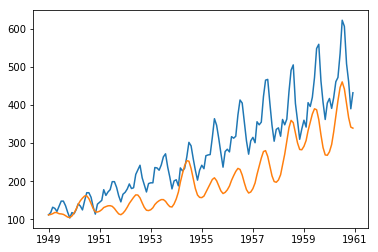

In [53]:
plt.plot(df)
plt.plot(prediction_ARIMA)

In [55]:
df.shape

(144, 1)

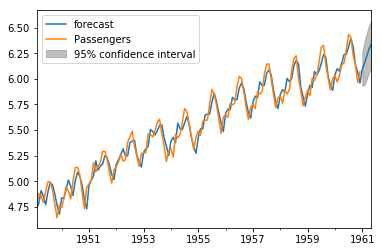

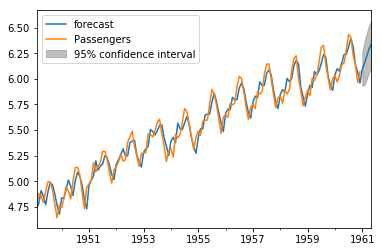

In [68]:
results.plot_predict(1, 148)
#x = results.forecast(steps = 12)

In [69]:
x=results.forecast(steps = 4)


In [70]:
x

(array([ 6.09553396,  6.15281411,  6.22442977,  6.29241113]),
 array([ 0.08384711,  0.10749463,  0.11568696,  0.11702776]),
 array([[ 5.93119664,  6.25987128],
        [ 5.94212851,  6.3634997 ],
        [ 5.9976875 ,  6.45117204],
        [ 6.06304093,  6.52178133]]))

In [67]:
np.exp(x[0])

array([ 443.87099219,  470.038266  ,  504.93503005,  540.45486776,
        567.73074821,  580.32813397,  577.00266593,  561.93884491,
        542.38460561,  525.56668331,  516.65906417,  518.14322195])